# Haar, HOG의 문제
- 회전 문제를 해결할 수 없음.

- 지역 특징점을 기반해서 찾으면 가능(corner)
- 특징점이 몇 개나 나올지 알 수 없다는 단점이 있지만 
- 이 방법 많이 사용


> 지역 특징점 검출 알고리즘 
- 특징점만으로 비교를 하기때문에 회전 등에 굉장히 강함.
- 시프트, 써프, 
- oRB(무료)



## transform의 종류
> affine ftansform
- 2d에서 사용

> persperctive Transform
- 3d에서 아용
- 2d에도 적용 가능



# ORB


In [17]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook

In [25]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 1. 어떤 책과 가장 비슷한가?

In [26]:
orb = cv2.ORB_create()

# 모두 특징점을 하나하나하 일일이 비교해서 검출
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

images = ['book1.jpg','book2.jpg','book3.jpg', 'book4.jpg']

database_kp = []
databese_desc = []

for name in images:
    img = cv2.imread('./images/book/'+name, cv2.IMREAD_GRAYSCALE)
    # keypoints: 모든 코너점, edge 아님
    # descripter: 거리
    keypoints, desc = orb.detectAndCompute(img, None)
    database_kp.append(keypoints)
    databese_desc.append(desc)

In [36]:
len(database_kp[0]), len(databese_desc)

(500, 4)

In [28]:
test= cv2.imread('./images/book/book1test.jpg', 0)
keypoints , desc = orb.detectAndCompute(test, None)
len(keypoints)

500

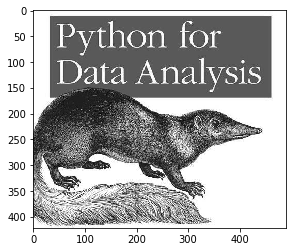

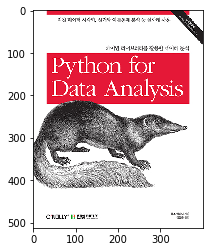

In [31]:
min_distance = 1000
inx = -1

for i in range(len(images)):
    # 매칭 정보
    matches = matcher.match(desc, databese_desc[i])
    matches = sorted(matches, key = lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d in good_matches:
        distance += d.distance
    # 평균거리 구하기
    distance /= len(good_matches)
    
    if min_distance > distance:
        min_distance= distance
        idx = i
        
imshow('', test)
imshow('', cv2.imread('./images/book/'+images[idx]))

In [32]:
test= cv2.imread('./images/book/book1test2.jpg', 0)
keypoints , desc = orb.detectAndCompute(test, None)
len(keypoints)

500

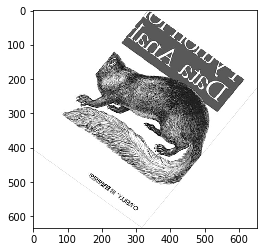

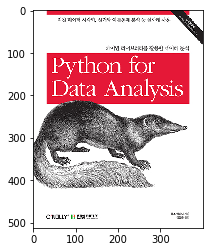

In [33]:
min_distance = 1000
inx = -1

for i in range(len(images)):
    # 매칭 정보
    matches = matcher.match(desc, databese_desc[i])
    matches = sorted(matches, key = lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d in good_matches:
        distance += d.distance
    # 평균거리 구하기
    distance /= len(good_matches)
    
    if min_distance > distance:
        min_distance= distance
        idx = i
        
imshow('', test)
imshow('', cv2.imread('./images/book/'+images[idx]))

In [34]:
test= cv2.imread('./images/book/book4test2.jpg', 0)
keypoints , desc = orb.detectAndCompute(test, None)
len(keypoints)

500

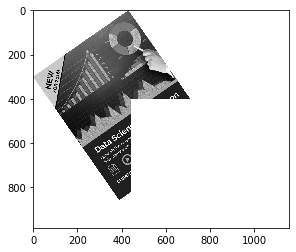

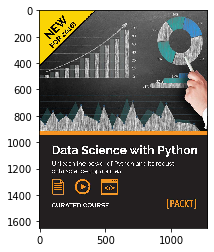

In [35]:
min_distance = 1000
inx = -1

for i in range(len(images)):
    # 매칭 정보
    matches = matcher.match(desc, databese_desc[i])
    matches = sorted(matches, key = lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d in good_matches:
        distance += d.distance
    # 평균거리 구하기
    distance /= len(good_matches)
    
    if min_distance > distance:
        min_distance= distance
        idx = i
        
imshow('', test)
imshow('', cv2.imread('./images/book/'+images[idx]))

# 호모그래피
- https://en.wikipedia.org/wiki/Homography_(computer_vision)
- 카메라가 회전되었을 때 
- 찍힌 사진을 보고 얼마만큼 scaling, transfer 해야 햐는지
- 9개 이상의 매칭 되는 점을 찾아서 거꾸로 계산해서
- 원본의 코너점이 그림에서 어디에 있는가?

### 활용ㅣreconstruction
> 로봇 청소기
- 전날 찍은 사진과 오늘 찍은 사진의 천정 사진의 특징점을 비교해서 H를 계산 하고,
- 그래서 집안 구조에 대한 모델링 실행
- 집 map만들기

> 2d 사진으로 3d 사진 만들때
- 구글에서 위성 사진 이용해서 3d 지도 만들기

- https://en.wikipedia.org/wiki/3D_reconstruction_from_multiple_images


# 2. scr2에서 scr1이 어디에 있는가?


In [55]:
src1 = cv2.imread('./images/book/box.png', 0)
src2 = cv2.imread('./images/book/box_in_scene.png', 0)

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key = lambda x: x.distance)
good_matches = matches[:50]
len(good_matches)

50

In [47]:
pts1= np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1,2)
pts2= np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1,2)

print(pts1.shape)

print(pts1)

(50, 1, 2)
[[[141.00482178 155.52001953]]

 [[139.96801758  55.29600525]]

 [[134.36930847  87.09121704]]

 [[ 70.8480072  167.61601257]]

 [[143.07841492  66.35520935]]

 [[127.87200928  63.93600464]]

 [[134.78401184 150.33601379]]

 [[ 89.85601044 162.43202209]]

 [[128.56321716  64.28160858]]

 [[ 64.28160858  68.42881012]]

 [[141.6960144  155.52001953]]

 [[ 88.12800598  62.20800781]]

 [[143.42401123  65.66400909]]

 [[ 74.30400848 103.68000793]]

 [[126.48961639 155.52001953]]

 [[ 63.93600464  69.12001038]]

 [[ 74.40000153 176.40000916]]

 [[126.14401245 155.52001953]]

 [[ 64.28160858 145.15202332]]

 [[134.78401184  72.57601166]]

 [[136.80000305 132.        ]]

 [[ 74.88000488 175.68000793]]

 [[136.51200867 127.87200928]]

 [[ 65.66400909 157.24801636]]

 [[ 74.64961243 116.12161255]]

 [[ 76.03200531 115.77600861]]

 [[ 76.7232132  134.78401184]]

 [[ 60.48000717  77.76000977]]

 [[145.15200806  58.75200653]]

 [[136.85762024 147.22561646]]

 [[ 70.50241089 118.19521332]

In [48]:
# H를 계산해주기(affin 변환에서 M 매트릭스)
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

In [49]:
H

array([[ 4.85610150e-01, -1.26423343e-01,  1.16639863e+02],
       [ 3.62734153e-02,  4.76039278e-01,  1.58710108e+02],
       [-1.20390936e-04, -1.08741047e-04,  1.00000000e+00]])

In [50]:
'''
H: 3 by 3 matrix
[회전정보, scale 정보, dx
회전정보, scale 정보, dy
perspective 정보, 1] 
'''

'\nH: 3 by 3 matrix\n[회전정보, scale 정보, dx\n회전정보, scale 정보, dy\nperspective 정보, 1] \n'

In [57]:
(h, w) = src1.shape[:2]

# 원본영상에서의 모서리 4개
# 왼쪽 위: (0,0), 왼쪽 위:(W, 0)
# cv2.poliline에서 그리는 방향대로 좌표값 순서 입력
corners1 = np.array([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2).astype('float32')
corners2 = cv2.perspectiveTransform(corners1, H)

print(corners1)
print(corners2)

[[[  0.   0.]]

 [[  0. 222.]]

 [[323. 222.]]

 [[323.   0.]]]
[[[116.63986 158.71011]]

 [[ 90.76499 270.93124]]

 [[261.93488 294.67987]]

 [[284.5573  177.32181]]]


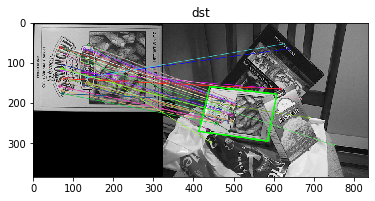

In [61]:
# (4,2)행렬 + vector값 => 각 행에 [w, 0]을 더하기 -> w만큼 이동
# 왼쪽에 원본, 오른쪽에 이미지를 그리기 위해서
corners3 = corners2 + np.float32([w, 0])

cv2.polylines(dst, [np.int32(corners3)], True, (0,255,0), 2, cv2.LINE_AA)
imshow('dst', dst)

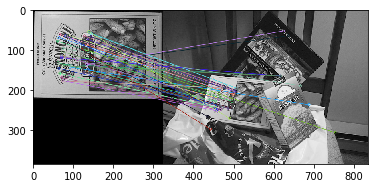

In [66]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

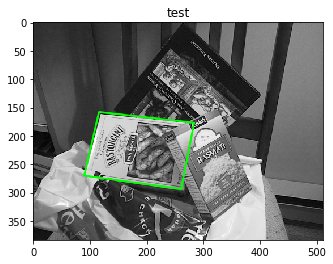

In [78]:
test = cv2.imread('./images/book/box_in_scene.png',1)
test
cv2.polylines(test, [np.int32(corners2)], True, (0,255,0), 2, cv2.LINE_AA)
imshow('test', test)

# 3. 여러 책 중에 책 찾기

In [217]:
def find_book(query, scene):
    src1 = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    src2 = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
    keypoints1, desc1 = orb.detectAndCompute(src1, None)
    keypoints2, desc2 = orb.detectAndCompute(src2, None)

    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key = lambda x: x.distance)
    good_matches = matches[:50]
#     len(good_matches)
    pts1= np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1,2)
    pts2= np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1,2)

#     print(pts1.shape)
    # H를 계산해주기(affin 변환에서 M 매트릭스)
    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
    
    (h, w) = src1.shape[:2]

    # 원본영상에서의 모서리 4개
    # 왼쪽 위: (0,0), 왼쪽 위:(W, 0)
    # cv2.poliline에서 그리는 방향대로 좌표값 순서 입력
    corners1 = np.array([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2).astype('float32')
    corners2 = cv2.perspectiveTransform(corners1, H)
    
    return np.int32(corners2)

In [218]:
query = cv2.imread('./images/book/book2.jpg')
scene = cv2.imread('./images/book/all_books.jpg')

In [219]:
corners2 = find_book(query, scene)


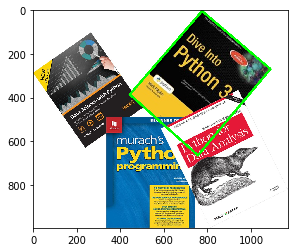

In [220]:
cv2.polylines(scene, [corners2], True, (0, 255, 0), 10, cv2.LINE_AA)

imshow("",scene )

## 문제 해결
> 원인 찾기
- H가 잘 못된것인지
- Maching점을 못찾은 것인지 찾기

In [225]:
def find_book(query, scene):
    src1 = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    src2 = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
    keypoints1, desc1 = orb.detectAndCompute(src1, None)
    keypoints2, desc2 = orb.detectAndCompute(src2, None)

    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key = lambda x: x.distance)
    good_matches = matches[:50]
#     len(good_matches)
    pts1= np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1,2)
    pts2= np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1,2)

#     print(pts1.shape)
    # H를 계산해주기(affin 변환에서 M 매트릭스)
    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
    print(H)
    
    (h, w) = src1.shape[:2]

    # 원본영상에서의 모서리 4개
    # 왼쪽 위: (0,0), 왼쪽 위:(W, 0)
    # cv2.poliline에서 그리는 방향대로 좌표값 순서 입력
    corners1 = np.array([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2).astype('float32')
    corners2 = cv2.perspectiveTransform(corners1, H)
    
    return pts1, pts2, corners1.astype('uint8'), corners2.astype('uint8'),keypoints1,keypoints2,good_matches

In [230]:
query = cv2.imread('./images/book/book2.jpg')
scene = cv2.imread('./images/book/all_books.jpg')

In [231]:
pts1, pts2, corners1, corners2,keypoints1,keypoints2,good_matches= find_book(query, scene)


[[ 1.47216554e+00 -1.39287721e+00  7.74688437e+02]
 [ 1.31210426e+00  1.53566659e+00  4.80145557e+00]
 [-9.33129880e-05 -7.61354348e-05  1.00000000e+00]]


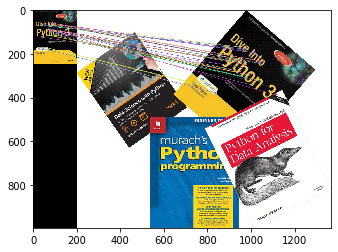

In [232]:
dst = cv2.drawMatches(query, keypoints1, scene, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

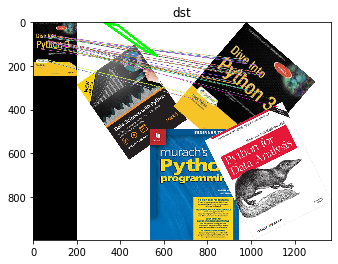

In [233]:
corners3 = corners2 + np.float32([w, 0])
cv2.polylines(dst, [np.int32(corners3)], True, (0,255,0), 10, cv2.LINE_AA)
imshow('dst', dst)

### 이미지 크기의 문제일수도 있음.
- 특징점 자체가 없어질수도 있음.